In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%run ..\..\..\..\funcoes_base_global\funcoes_plot.py

In [2]:
input_path  = os.path.join('..','..','1_preprocessamento','out','')
output_path = os.path.join('out','')
if not os.path.exists(output_path): 
    os.mkdir(output_path)

In [3]:
df = pd.read_csv(input_path+'df_temp_tratada.csv.gz', compression = 'gzip', parse_dates = ['Date'], index_col = 'Date')A
df.head()

,Temp_Ent_301,Temp_Ent_302,Temp_Suc_1,Temp_Suc_2,Temp_Oleo,Temp_Motor_A,Temp_Motor_B,Temp_Motor_C,Temp_Manc_DE,Temp_Manc_NDE,Pot_Cons,Temp_Desc_1,Temp_Desc_2,Temp_Desc_2_shift
Date,,,,,,,,,,,,,,
2009-01-12 10:52:00,NaN,NaN,30.854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437.375,NaN,NaN,NaN
2009-01-12 10:53:00,NaN,NaN,30.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453.852,NaN,NaN,NaN
2009-01-12 10:54:00,NaN,NaN,30.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465.641,NaN,NaN,NaN
2009-01-12 10:55:00,NaN,NaN,29.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472.429,NaN,NaN,NaN
2009-01-12 10:56:00,NaN,NaN,25.806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479.363,NaN,NaN,NaN


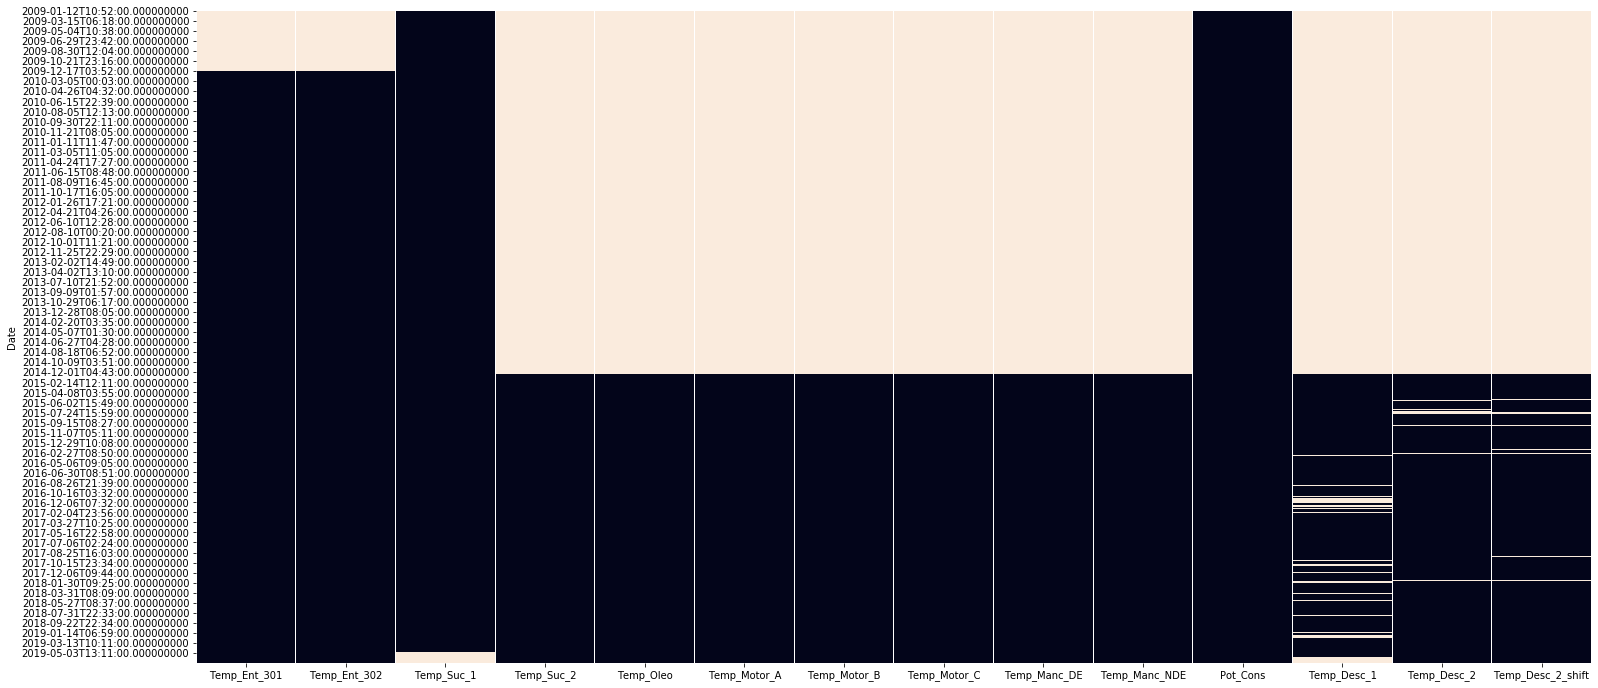

In [4]:
plt.figure(figsize = [25,12])
sns.heatmap(df.isnull(), cbar = False)

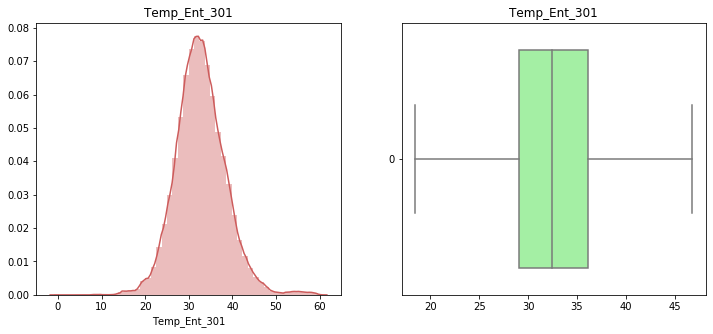

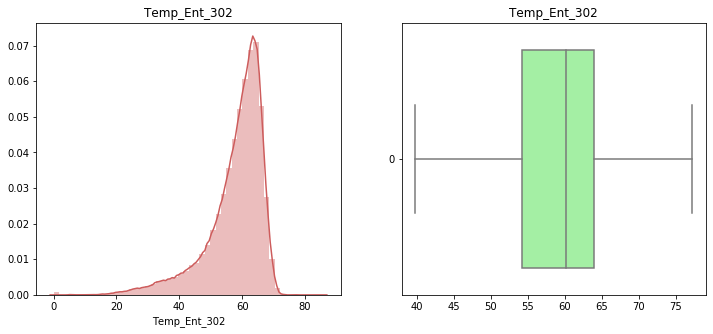

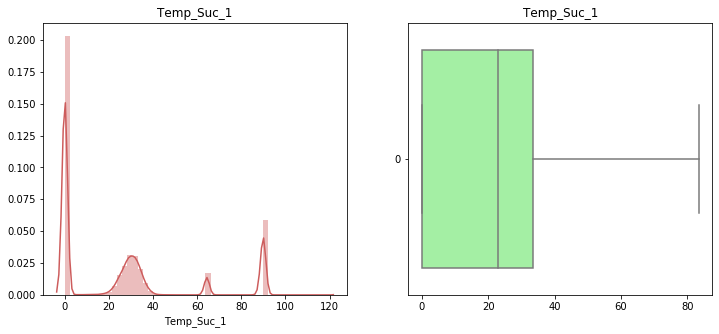

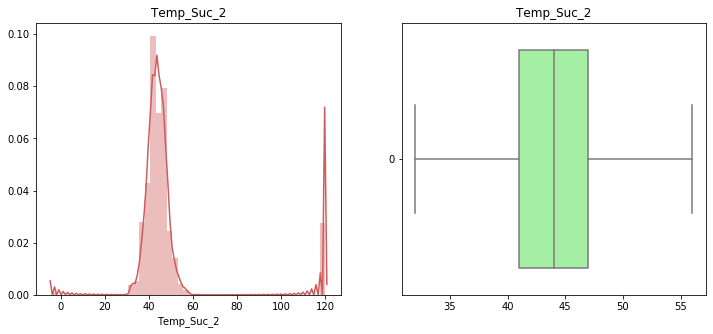

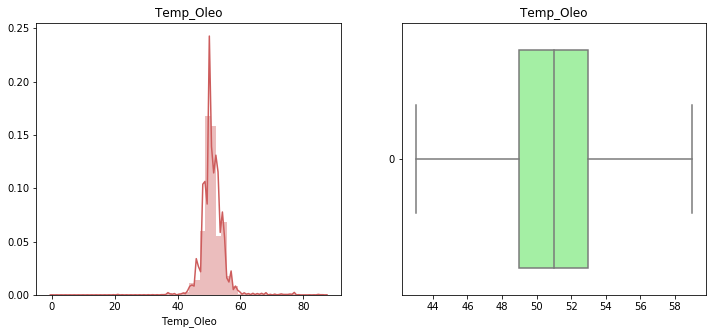

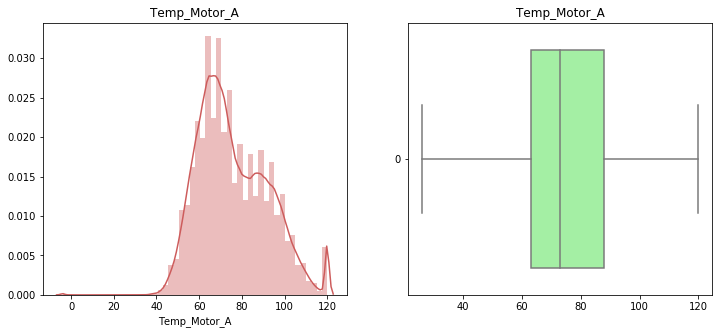

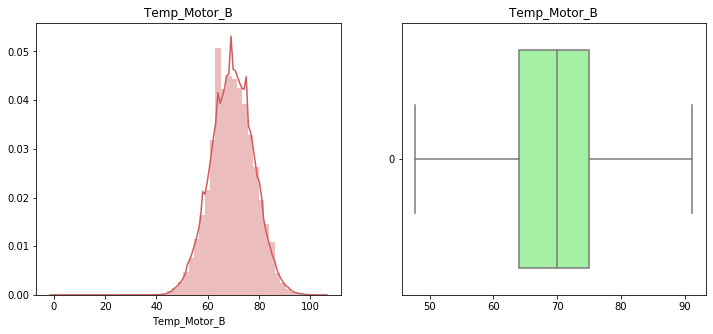

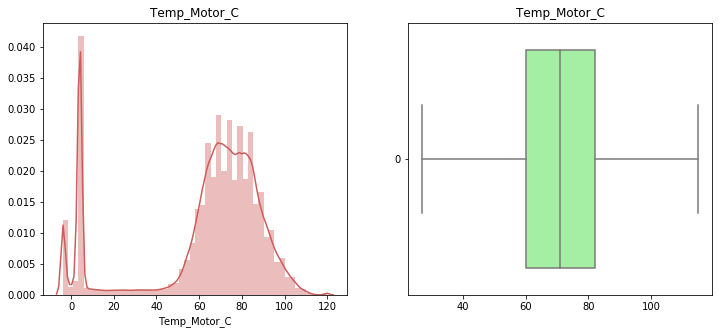

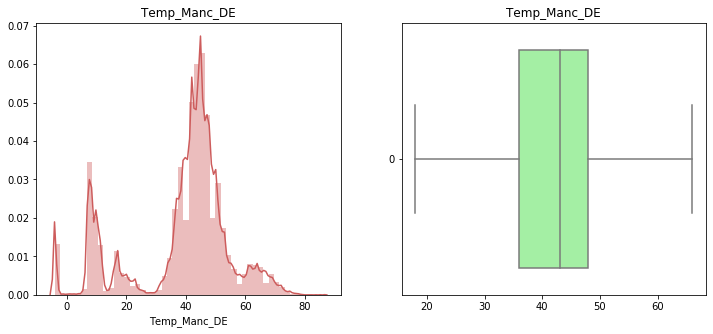

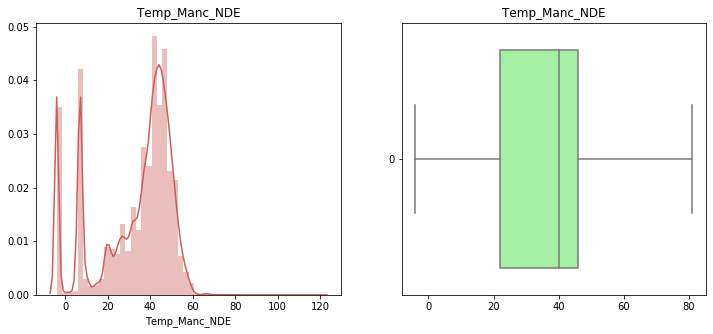

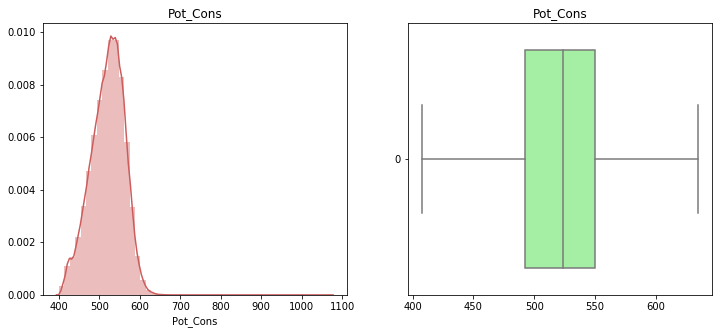

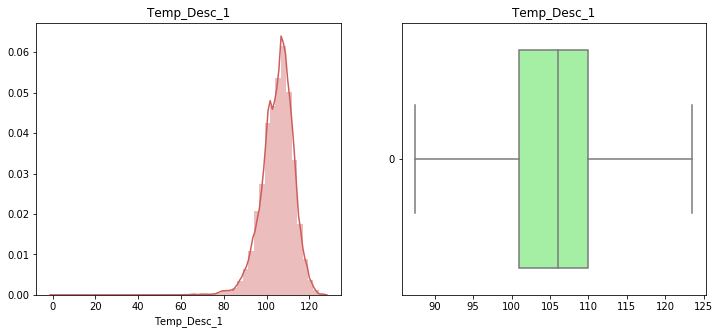

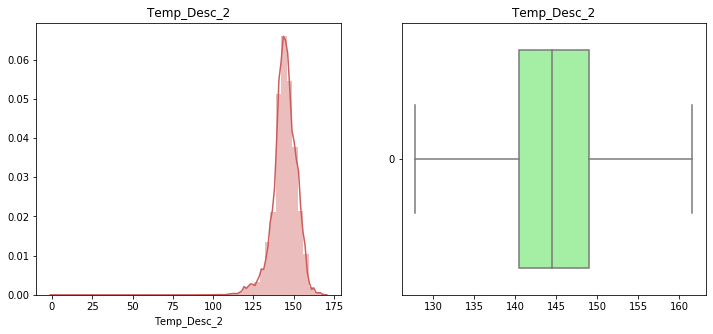

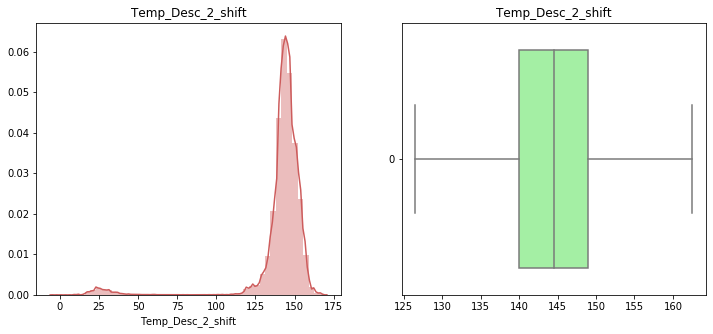

In [5]:
df_plot = df.dropna(axis = 1, how = 'all')

variables = list(df_plot.columns)

for i in variables:
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(i)
    axes[1].set_title(i)
    sns.distplot(df_plot[i].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_plot[i].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

In [7]:
df_dens = pd.read_csv('..\\..\\2_exploracao_e_visualizacao\\out\\df_gas_filtrada.csv.gz', compression = 'gzip', parse_dates = ['Date'], index_col = 'Date')
df_dens.head()

,AI25121.PV,AI25131.PV,AI25141.PV,AI25151.PV,AI25161.PV,AI25171.PV,AI25181.PV,AI25191.PV,AI25211.PV
Date,,,,,,,,,
2009-01-10 14:38:00,6.574,2.172,0.049,6.989,0.421,0.175,0.014,0.0,0.109
2009-01-10 14:39:00,2.857,0.949,0.006,1.059,0.063,0.021,0.007,0.0,0.158
2009-01-10 14:40:00,2.857,0.949,0.006,1.059,0.063,0.021,0.000,0.0,0.189
2009-01-10 14:41:00,2.857,0.949,0.006,1.059,0.063,0.021,0.000,0.0,0.220
2009-01-10 14:42:00,2.857,0.949,0.006,1.059,0.063,0.021,0.000,0.0,0.278


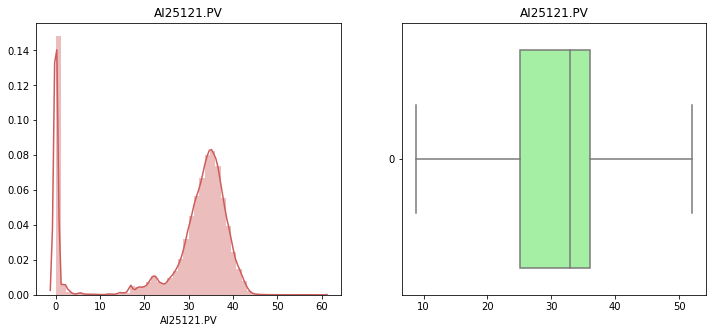

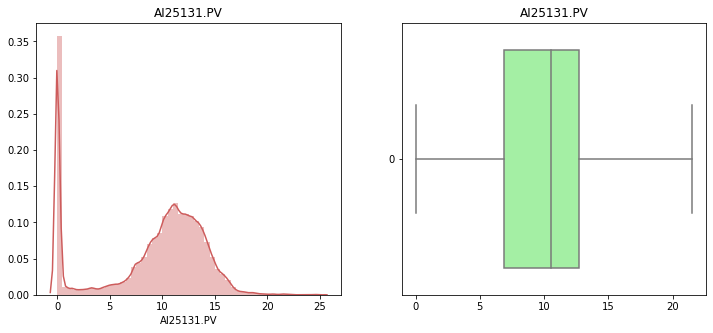

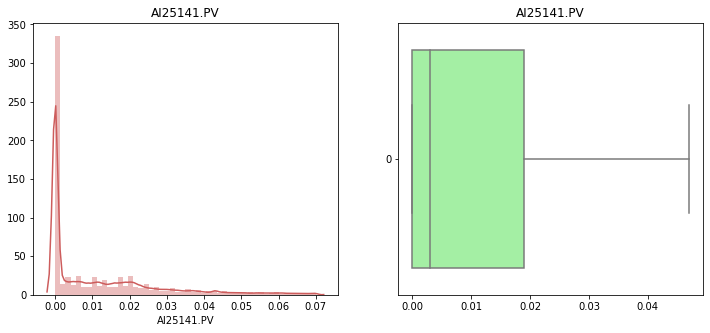

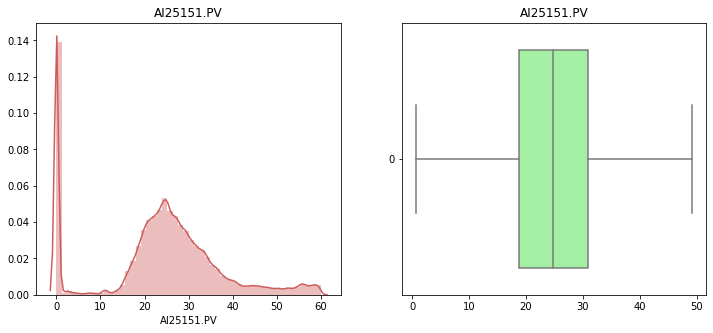

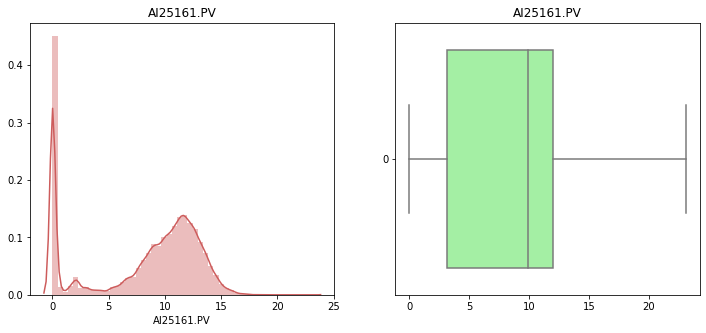

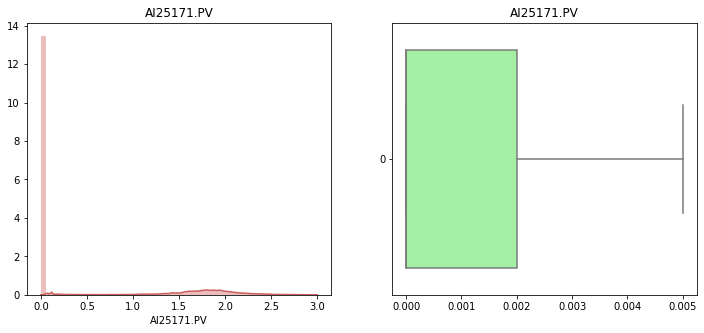

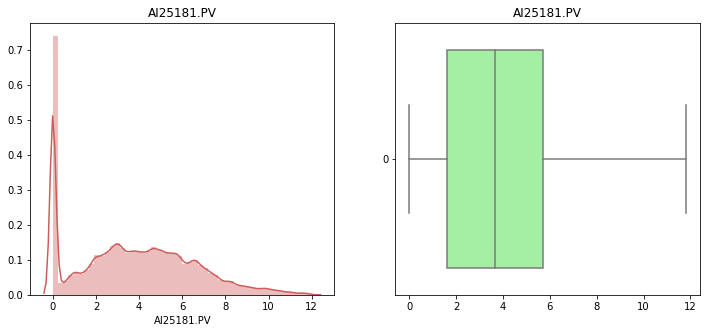

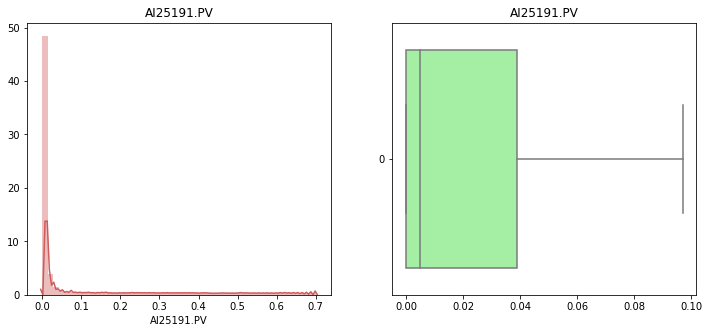

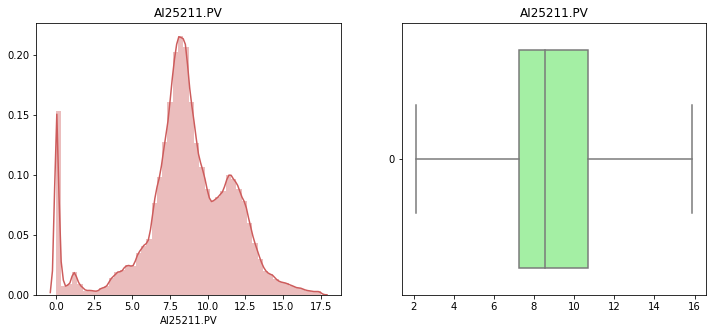

In [8]:
col = [x for x in df_dens.columns if '25' in x]
col = [x for x in col if '_qua' not in x]

df_plot_dens = df_dens[col].dropna(axis = 1, how = 'all')

for i in col:
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(i)
    axes[1].set_title(i)
    sns.distplot(df_plot_dens[i].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_plot_dens[i].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

In [9]:
df_merge = pd.merge(df, df_dens, on = 'Date', validate = 'one_to_one')

In [10]:
variaveis = ['Temp_Desc_2', 'Temp_Desc_2_shift', 'Temp_Desc_1', 'Pot_Cons', 'Temp_Suc_2']
if col[0] not in variaveis:
    variaveis = variaveis + col

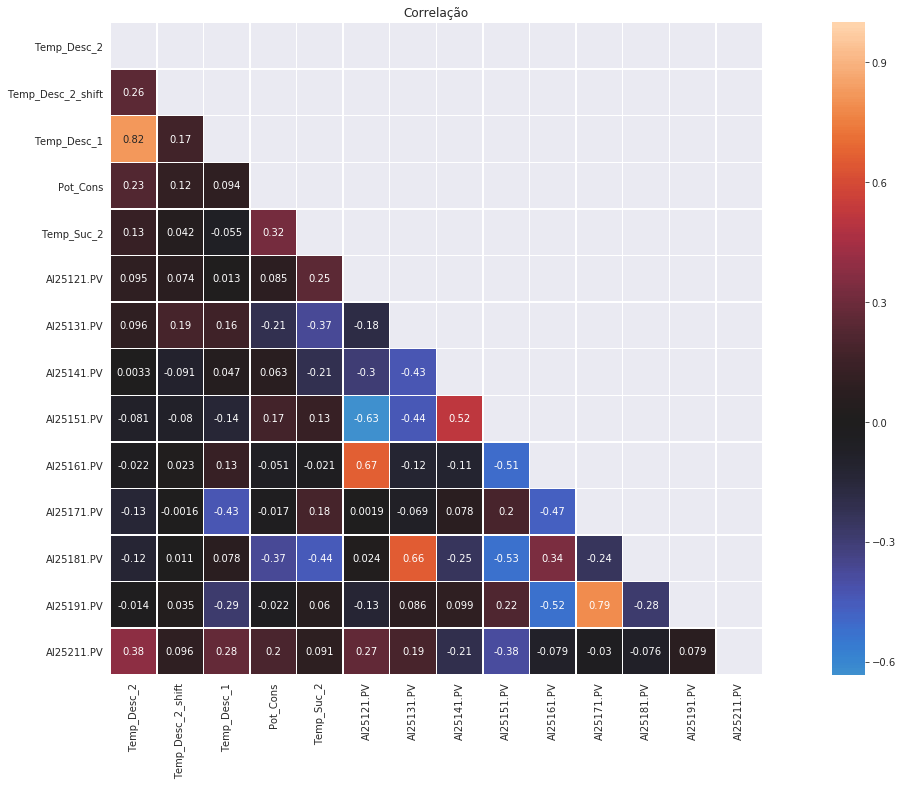

In [11]:
inicio_data = '2018-01-01 00:00:00'
fim_data = '2019-01-01 00:00:00'

df_merge = df_merge.dropna(axis = 1, how = 'all')

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

corr = df_merge[variaveis][(df_merge.index >= start_date) & (df_merge.index <= end_date)].dropna().corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style('dark'):
    plt.figure(figsize = [25, 12])
    plt.title('Correlação')
    sns.heatmap(corr, mask = mask, center = 0, annot = True, square = True, linewidths = .5)
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0) 

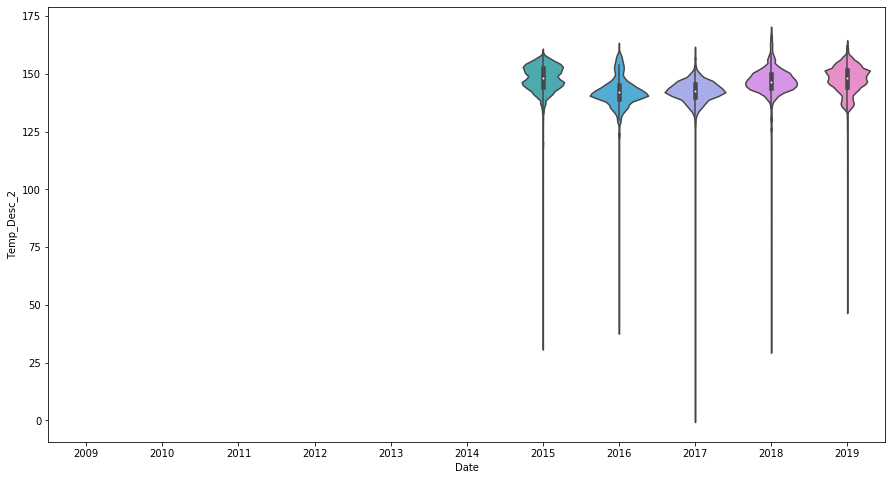

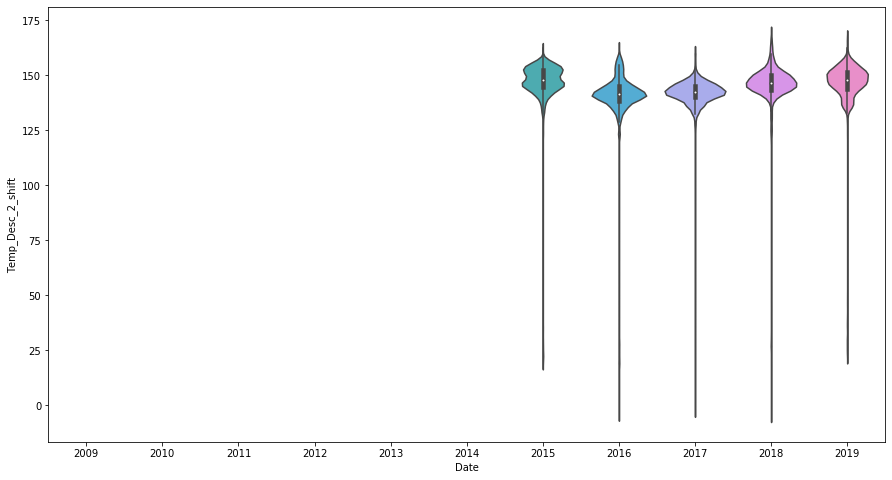

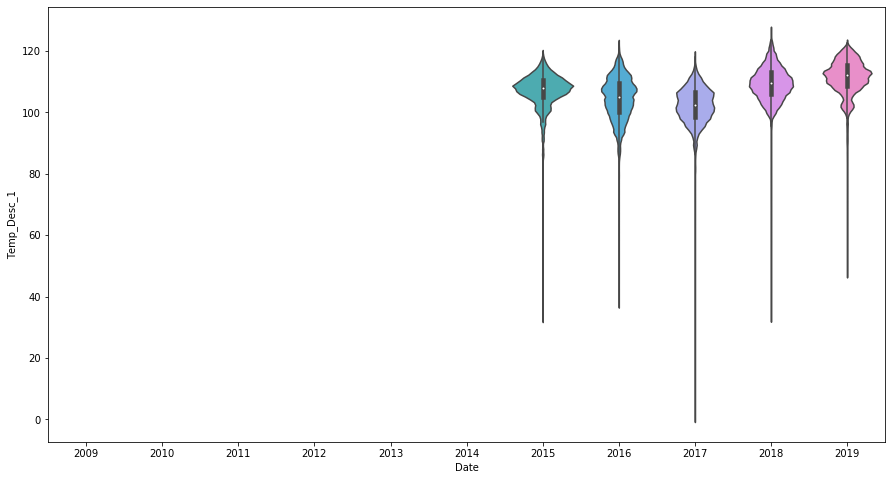

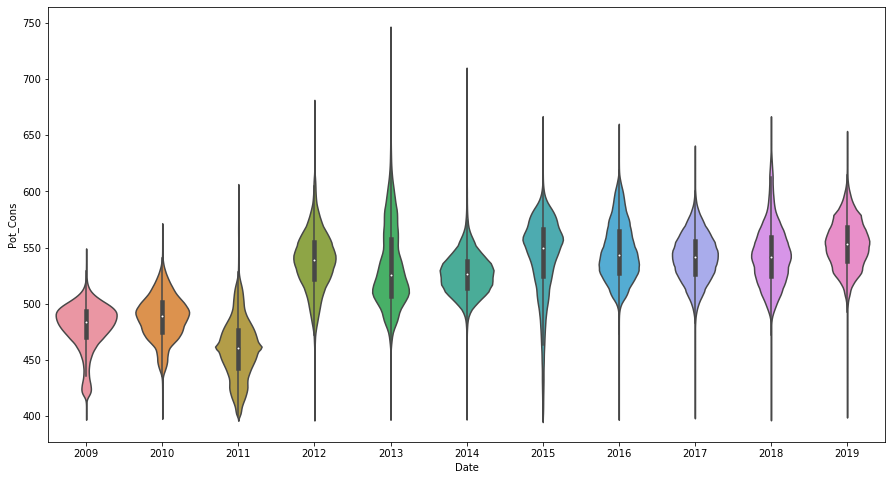

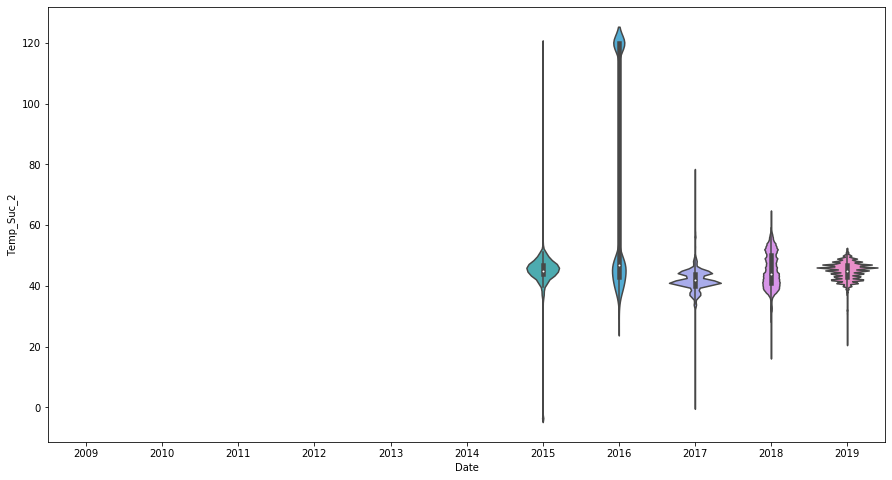

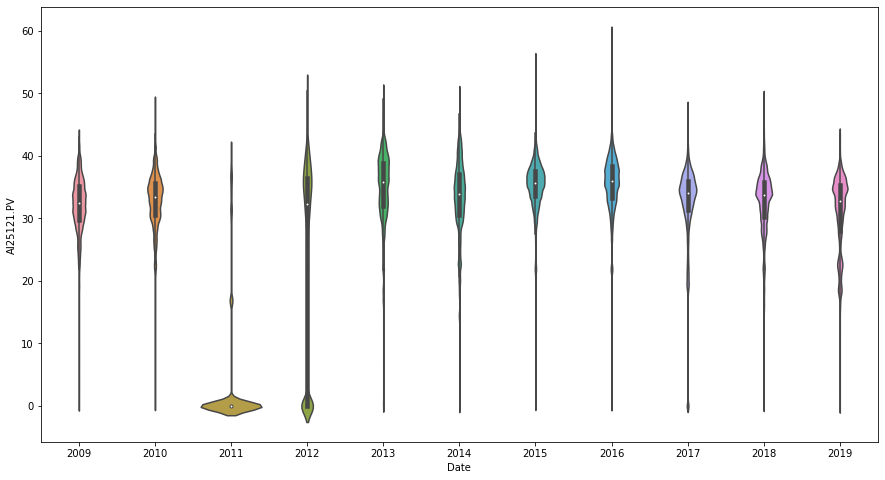

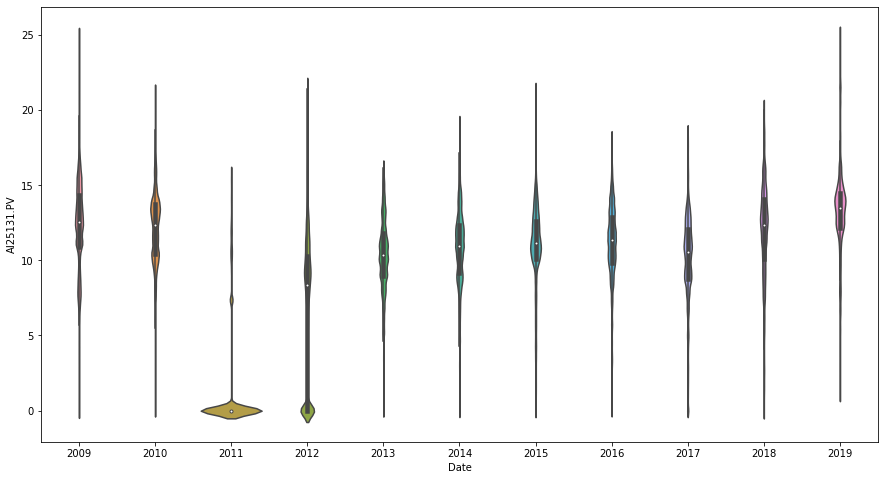

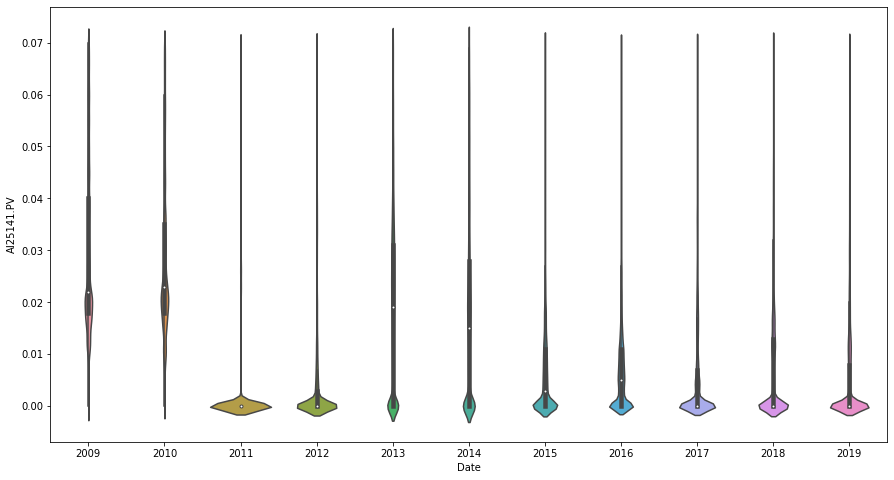

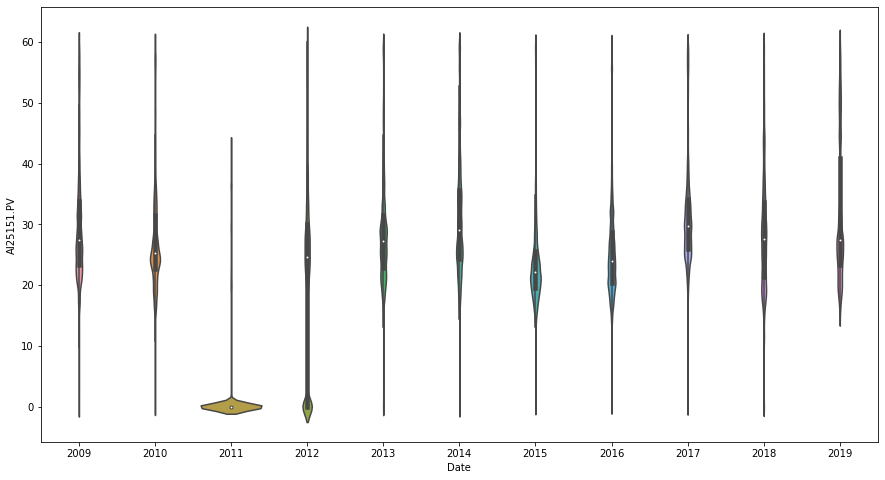

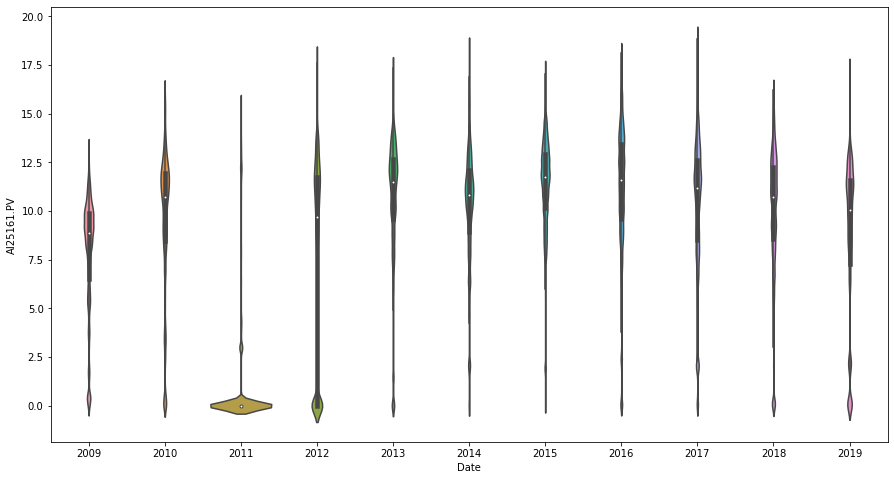

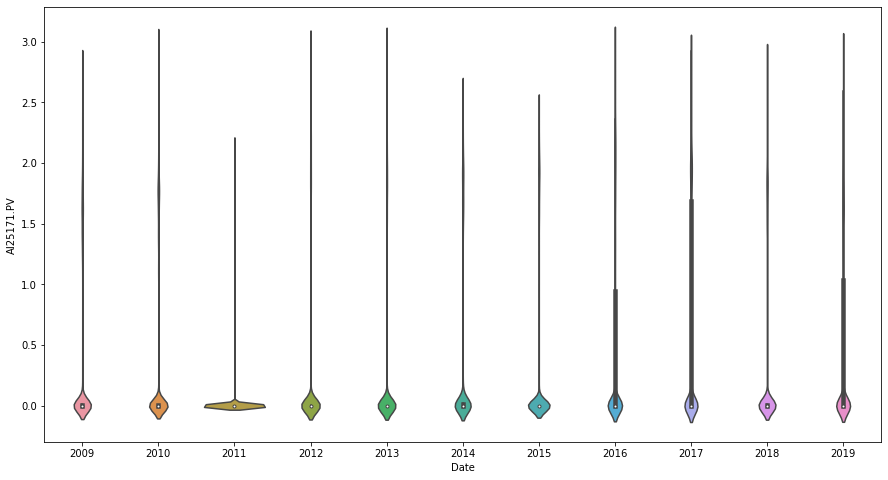

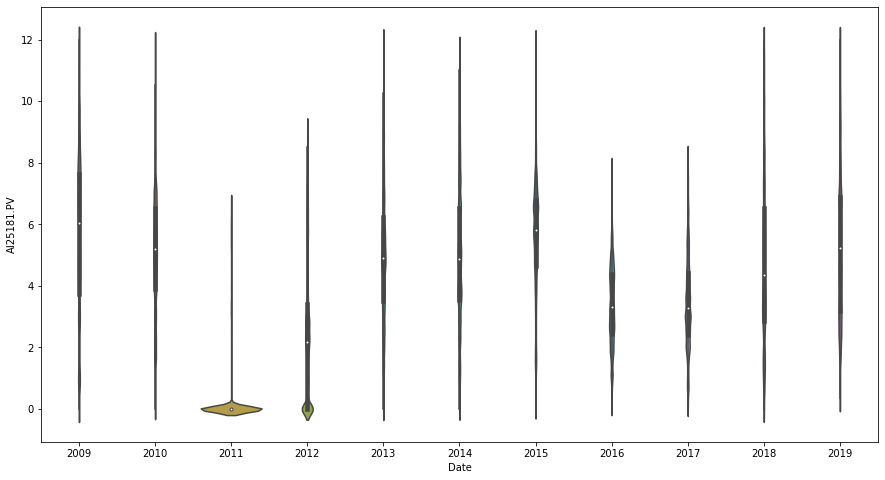

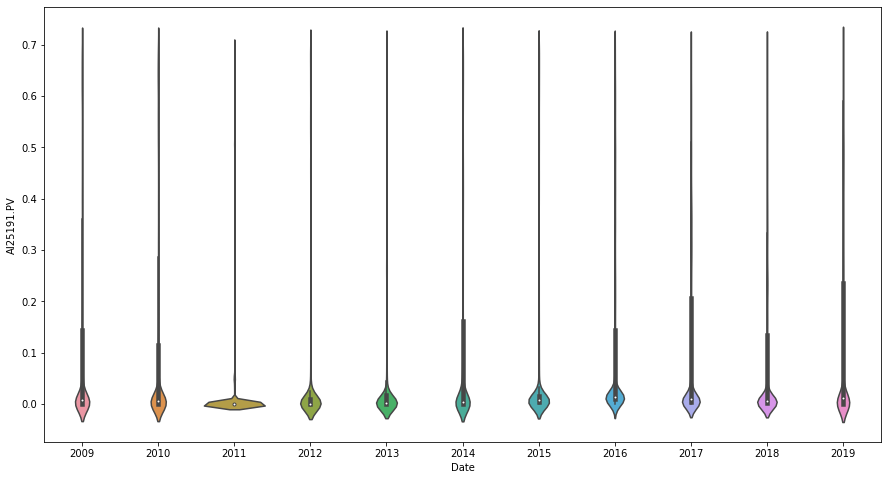

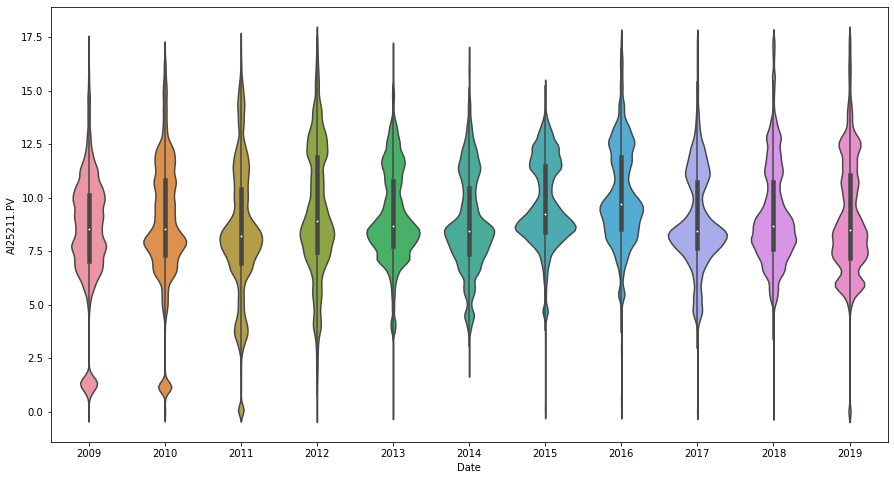

In [12]:
for i in variaveis:
    plt.figure(figsize = (15, 8))
    sns.violinplot(x = df_merge.index.year, y = i, data = df_merge)
    name = i+' ao longo dos anos'
    #plt.savefig('./figuras/'+name+'.png', dpi = 300)
    plt.show()

In [13]:
%%time
df_filter = df_merge.copy()
for i in variaveis:
    df_filter = df_filter[df_filter[i] >= 0]

Wall time: 2.84 s


###  Seleção dos Dados:
* Dados a partir de 2015

###### 100 $\leq$ Temp_Desc_2 $\leq$ 165
######  75 $\leq$ Temp_Desc_1 $\leq$ 125
######  30 $\leq$ Temp_Suc_2  $\leq$  60

In [14]:
df_use = df_filter[variaveis].copy()
df_use = df_use[df_use.index.year >= 2015]
df_use = df_use[(df_use['Temp_Desc_2']    >= 100) & (df_use['Temp_Desc_2']    <=  165)]
df_use = df_use[(df_use['Temp_Desc_1']    >=  75) & (df_use['Temp_Desc_1']    <=  125)]
#df_use = df_use[(df_use['Temp_Ent_302']   >=  20) & (df_use['Temp_Ent_302']   <=   80)]
df_use = df_use[(df_use['Temp_Suc_2'] >=  30) & (df_use['Temp_Suc_2'] <=   60)]
#df_use.drop(columns = ['Temp_Suc_1', 'Temp_Motor_A', 'Temp_Motor_C', 'Temp_Manc_NDE', 'Temp_Ent_301'], inplace = True)

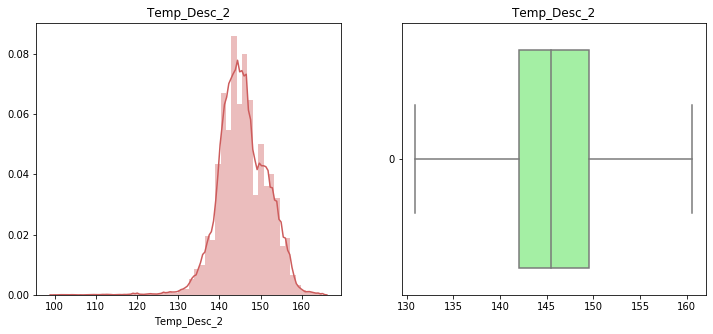

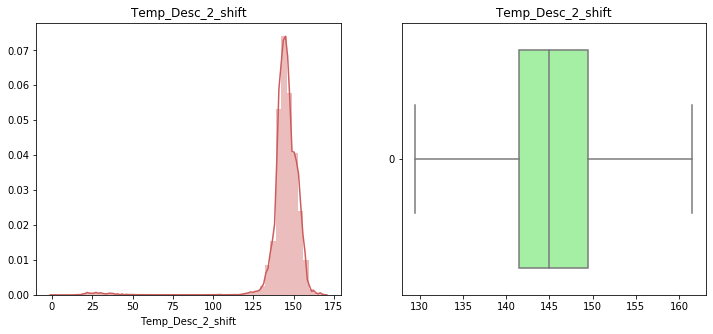

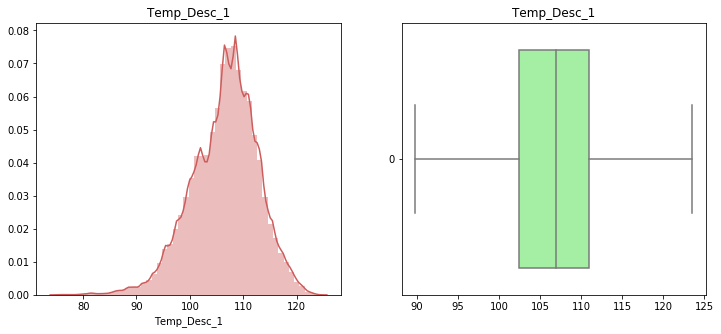

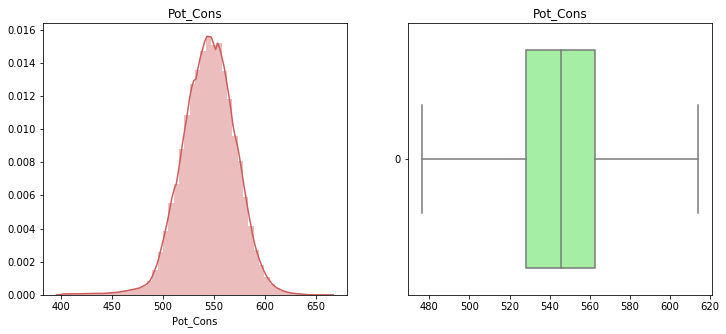

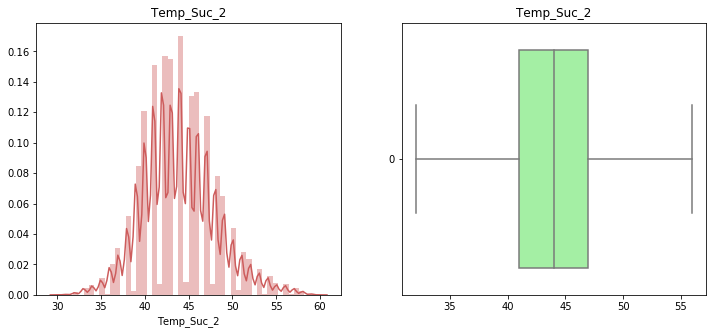

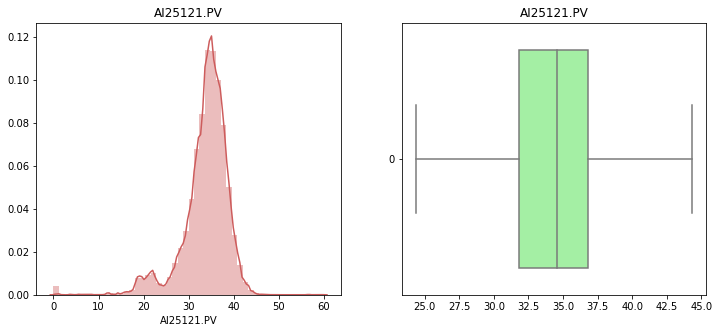

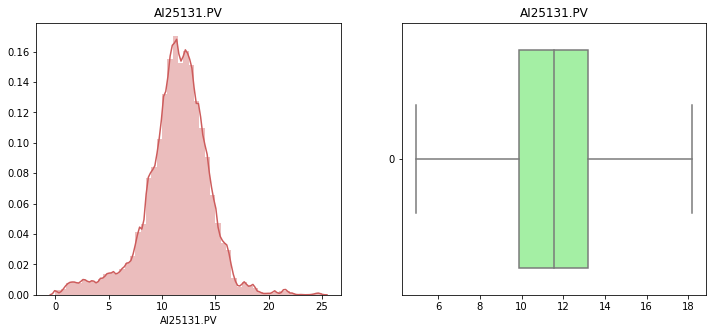

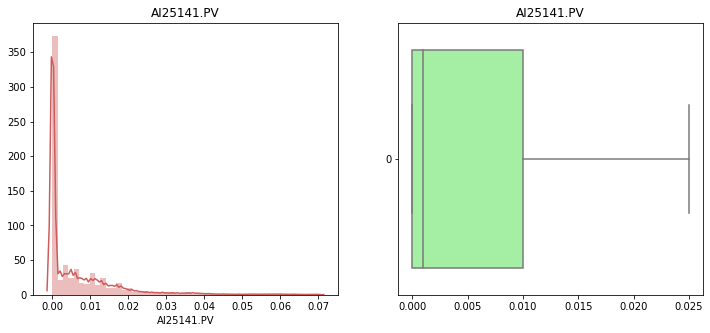

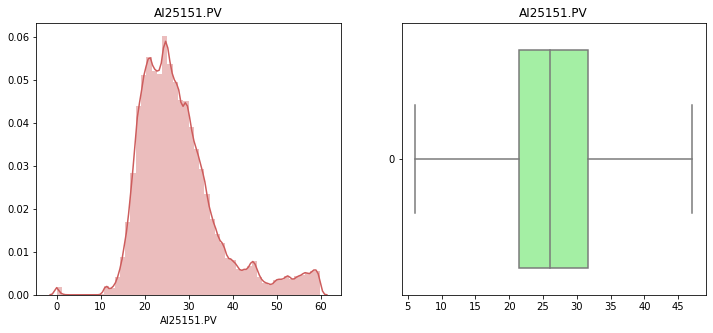

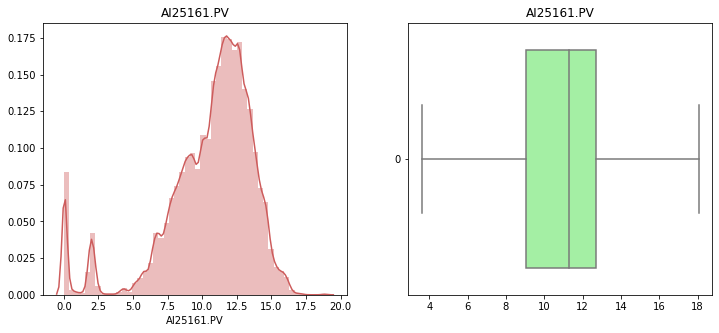

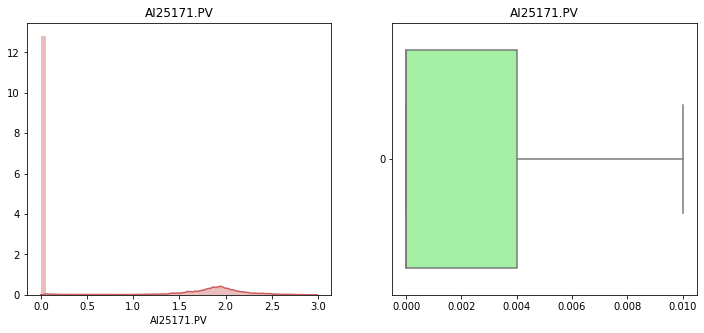

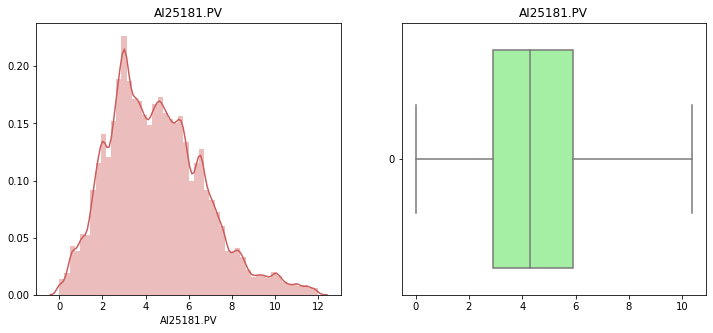

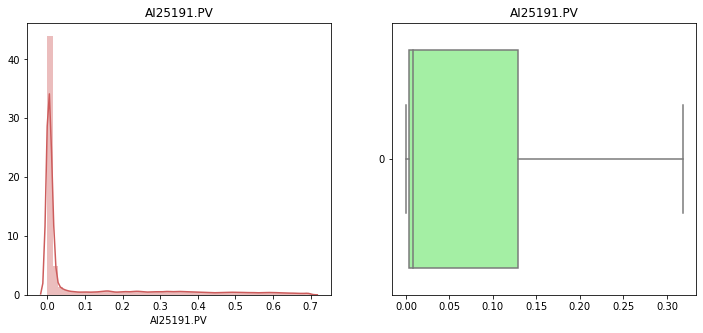

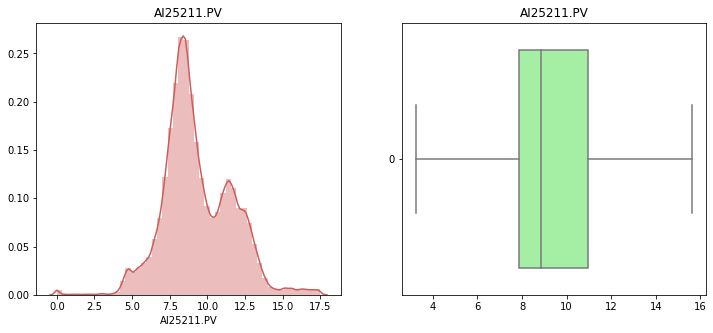

In [15]:
for i in df_use.columns:
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(i)
    axes[1].set_title(i)
    sns.distplot(df_use[i].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_use[i].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

In [18]:
hora_hora = True
if hora_hora:
    df_use = df_use.resample('1H', closed='right', axis = 0).mean()
    df_use.to_csv(output_path+'df_temperatura_modelo_linear_hh.csv.gz', compression = 'gzip')
else:
    df_use.to_csv(output_path+'df_temperatura_modelo_linear.csv.gz', compression = 'gzip')